## VISUALIZAÇÃO TEMPORAL DE PRESSÃO

O objetivo desse notebook é visualizar:
* Anos com dados nulos
* O comportamento da tag ao longo do tempo

Requisitos para rodar esse notebook:
* É necessário rodar '1_preprocessamento'/'0.1_analise_tags_recebidas'

In [1]:
import json
import pandas as pd
import os
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import time

%run ..\..\..\funcoes_base_global\funcoes_plot.py

#### Leitura do Arquivo JSON contendo todas as Tag's e suas descrições

In [2]:
dir_tags = '..\\..\\..\\funcoes_base_global\\tags_description.json' 

with open(dir_tags) as f:
    tags_names = json.loads(f.read())

#### Exemplo de Utilização

In [3]:
comp = '302A'
tipo = 'Pressao'
tags_names[comp][tipo]

{'PDI3413.PV': 'PRESSAO OLEO',
 'PI3401.PV': 'PRESSAO FLUSH',
 'PI3406.PV': 'PRESSAO DESCARGA 2o ESTAGIO',
 'PI3417.PV': 'PRESSÃƒO SUCCAO 2o ESTAGIO',
 'PIC3002.PV': 'PRESSÃƒO SUCCAO 1o ESTAGIO'}

In [4]:
def path(name):
    path = os.path.join('..','1_preprocessamento','out',name)
    return(path)

def path_out(name):
    path = os.path.join('out',name)
    return(path)

In [5]:
df = pd.read_csv(path('df_pressao.csv.gz'), compression = 'gzip', parse_dates = ['Date'], index_col = 'Date')

C:\Users\jessica.assumpcao\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
colunas = [x for x in list(tags_names[comp][tipo].keys()) if x in df.columns]

columns_drop = df.columns[df.columns.str.contains('_quality')]
data = df[colunas]

### 1. Anos faltantes

In [6]:
# criando um dataframe novo cujo index são os anos
df_year = data.copy()
df_year.index = df_year.index.year

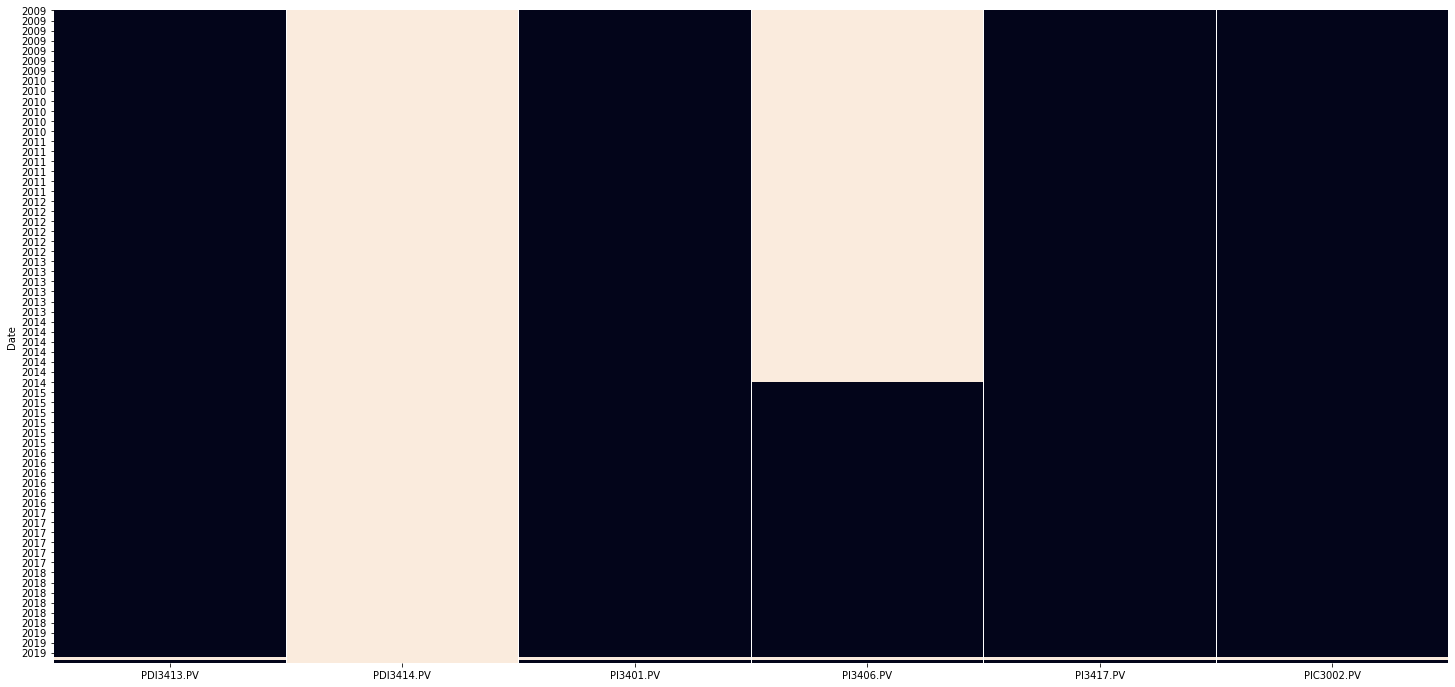

In [7]:
plt.figure(figsize = [25,12])
sns.heatmap(df_year.isnull(), cbar = False)

### 2. A partir de 2009

(5517491, 1)


C:\Users\jessica.assumpcao\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
C:\Users\jessica.assumpcao\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


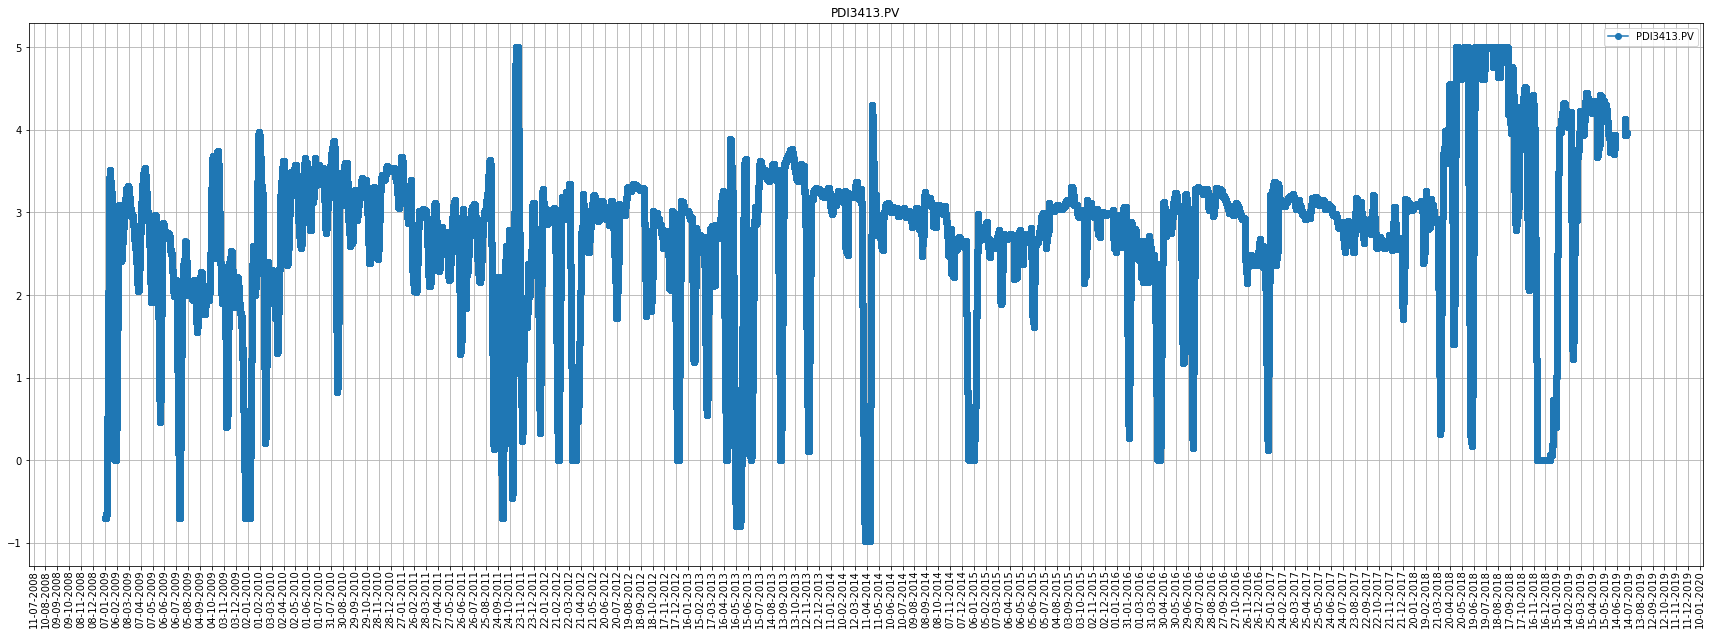

(5517491, 1)


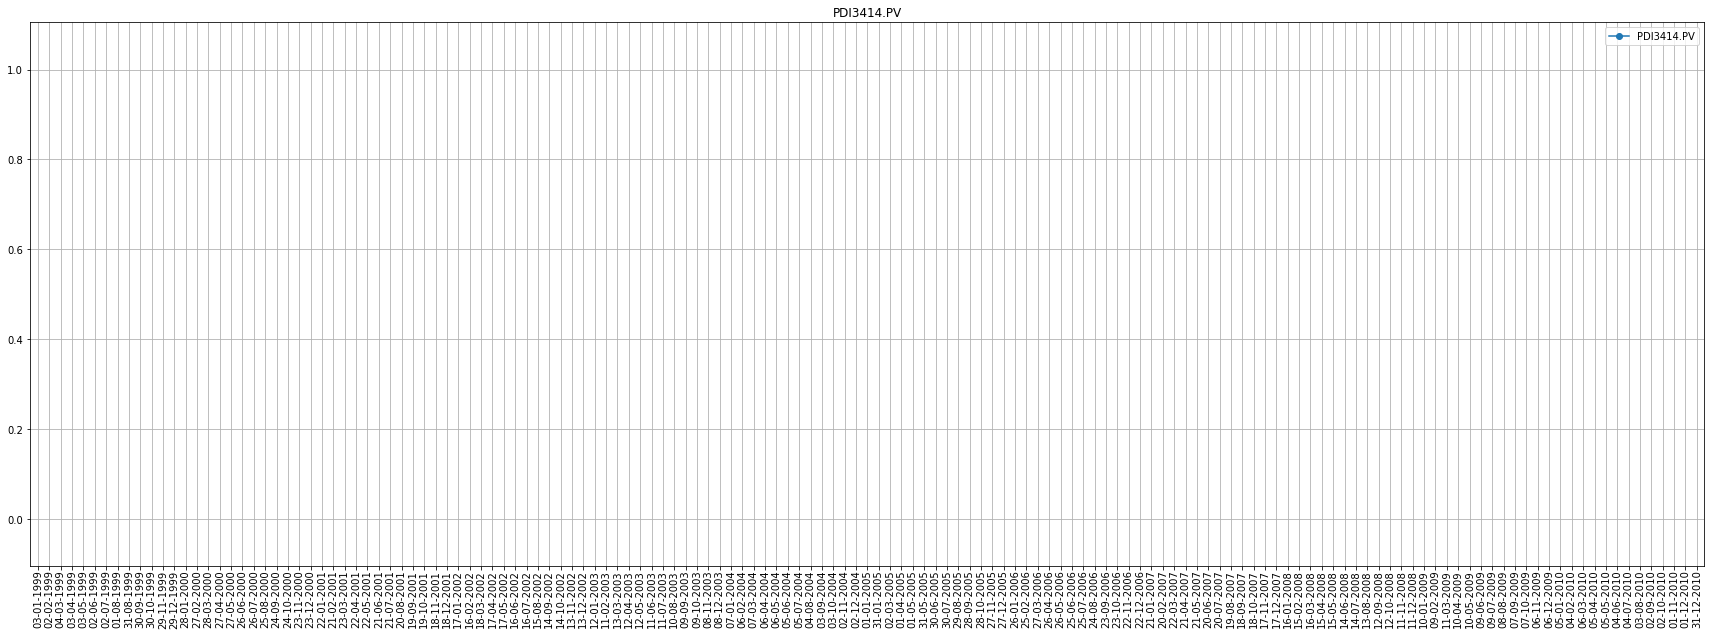

(5517491, 1)


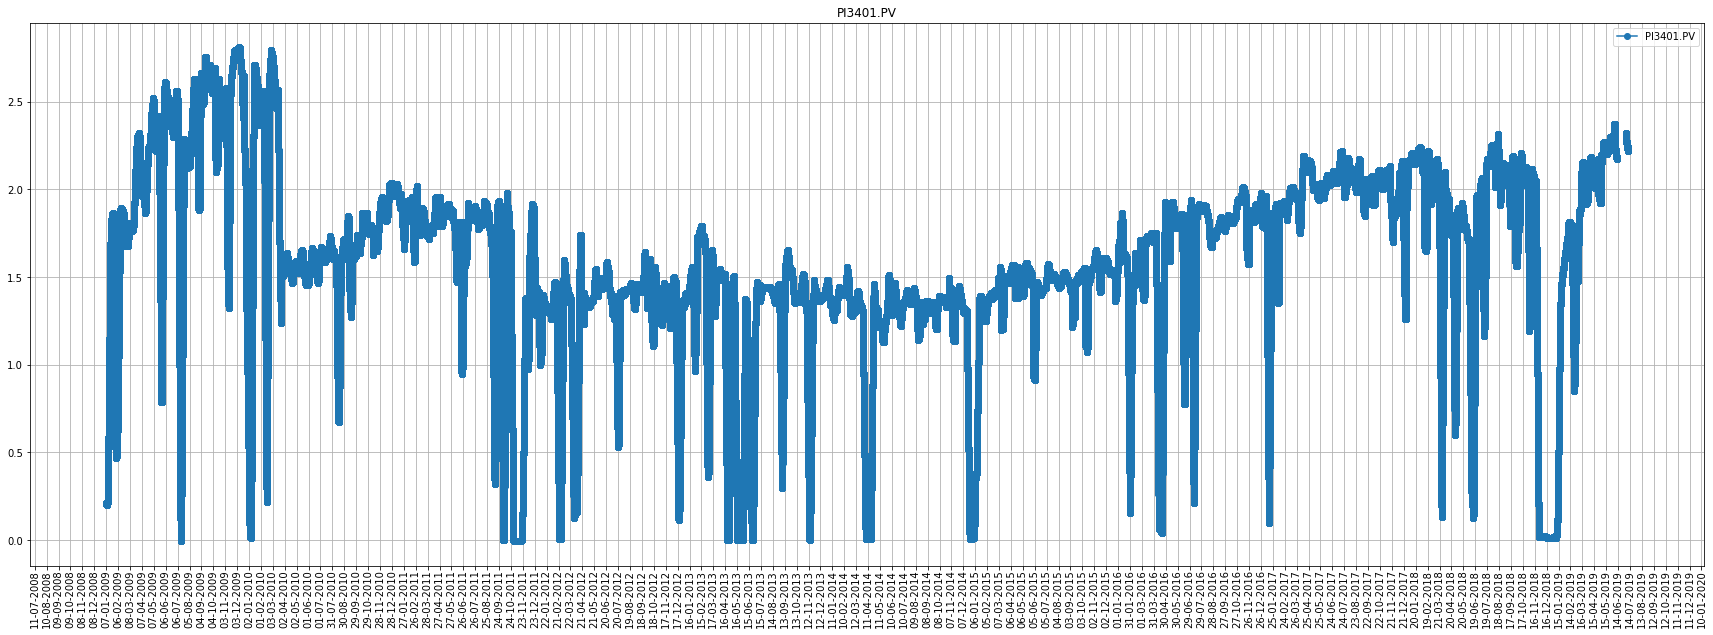

(5517491, 1)


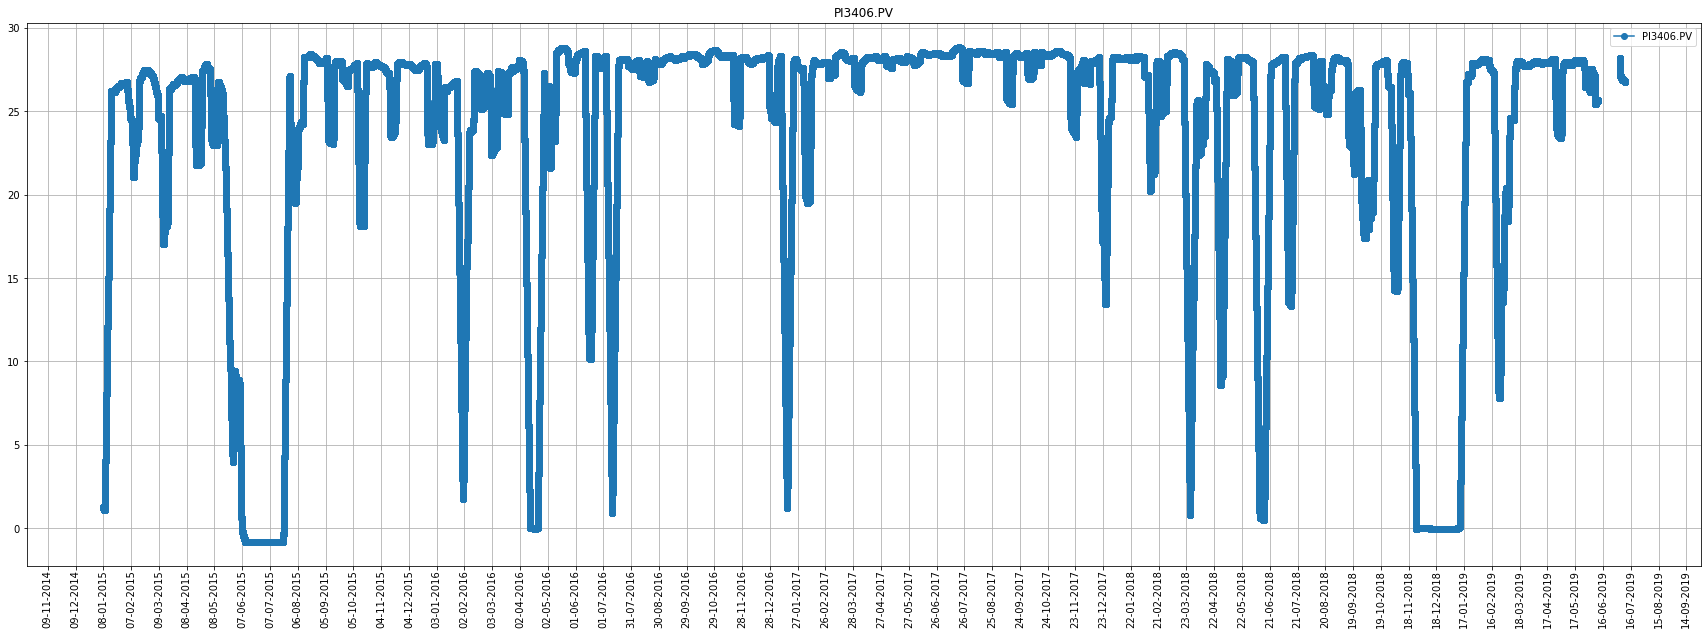

(5517491, 1)


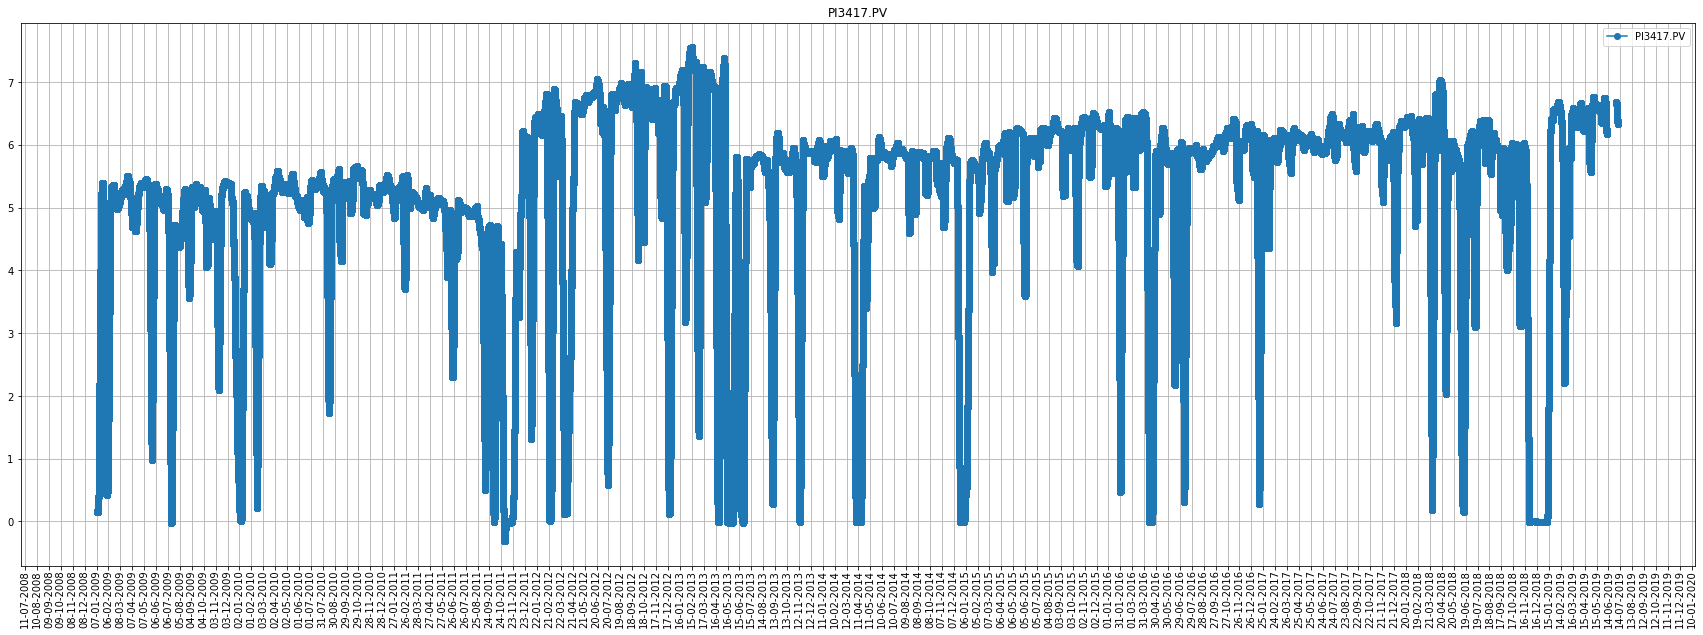

(5517491, 1)


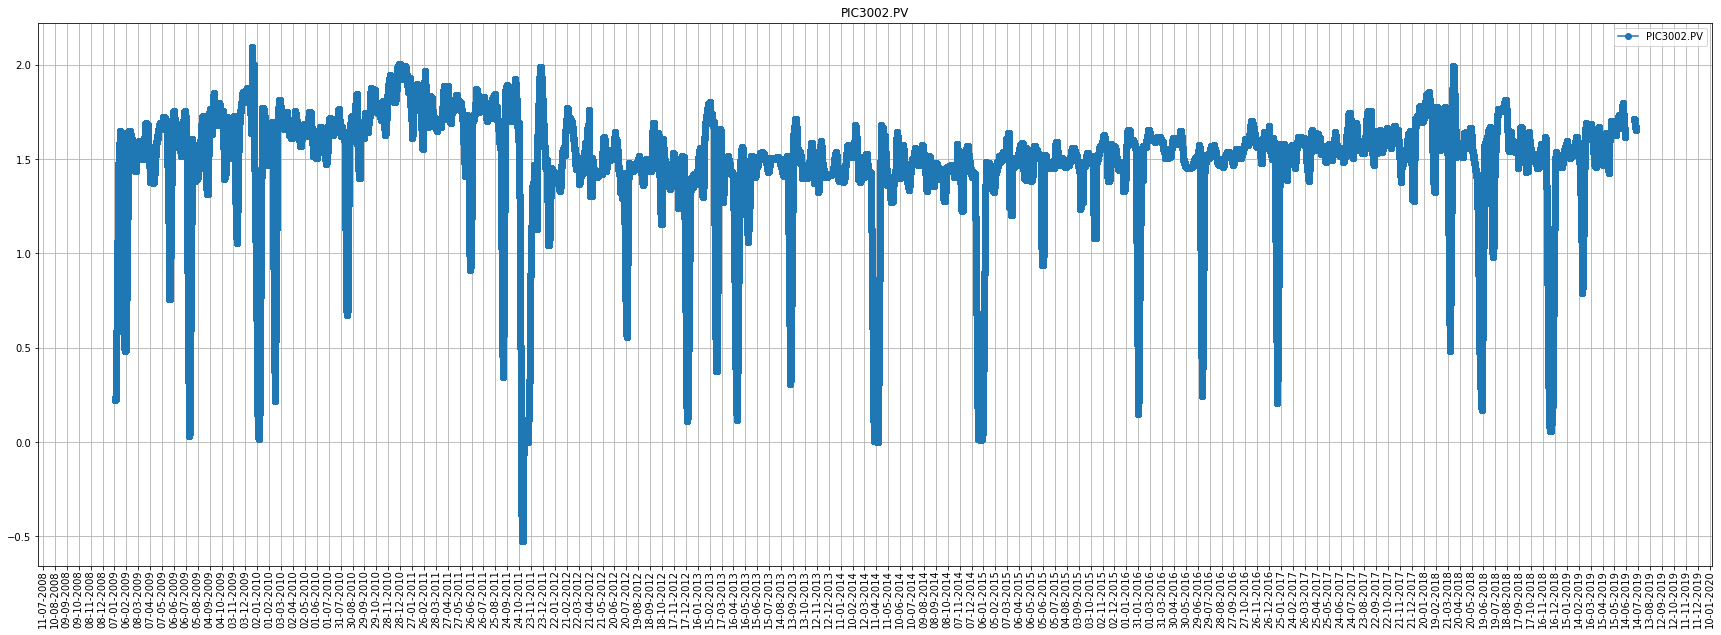

In [8]:
start_date ='2009-01-01 00:00:00'
end_date = '2019-10-30 23:59:00'
days_interval = 30
minutes_interval = 60*12
roling = [7*60*24]
for tag in colunas:
    plot_variables_rolling_V2(data,[tag],legend=[tag],reference_line=[],
                           rolling_time=roling,
                           minutes_interval=minutes_interval,start_date=start_date,end_date=end_date,days_interval=days_interval);

### 3. A partir de 2015

(2371445, 1)


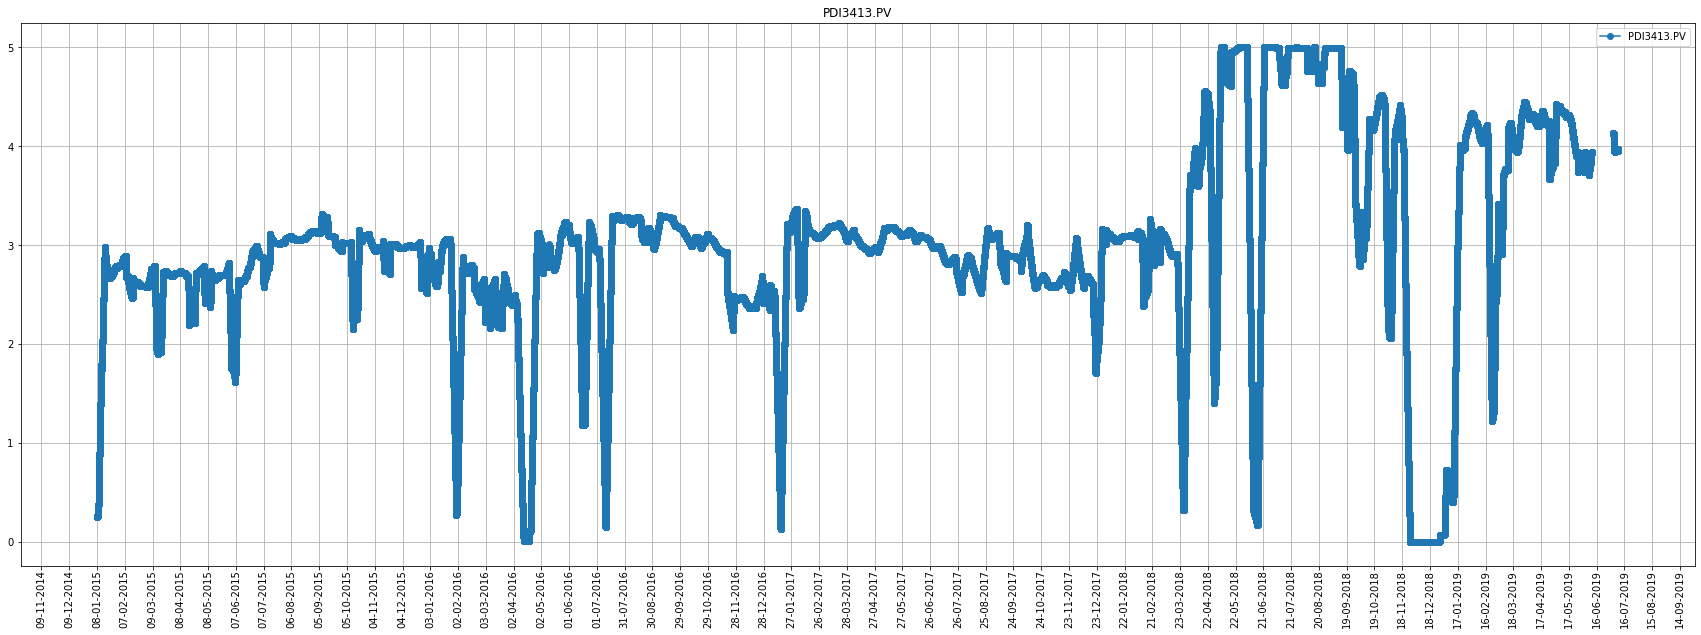

(2371445, 1)


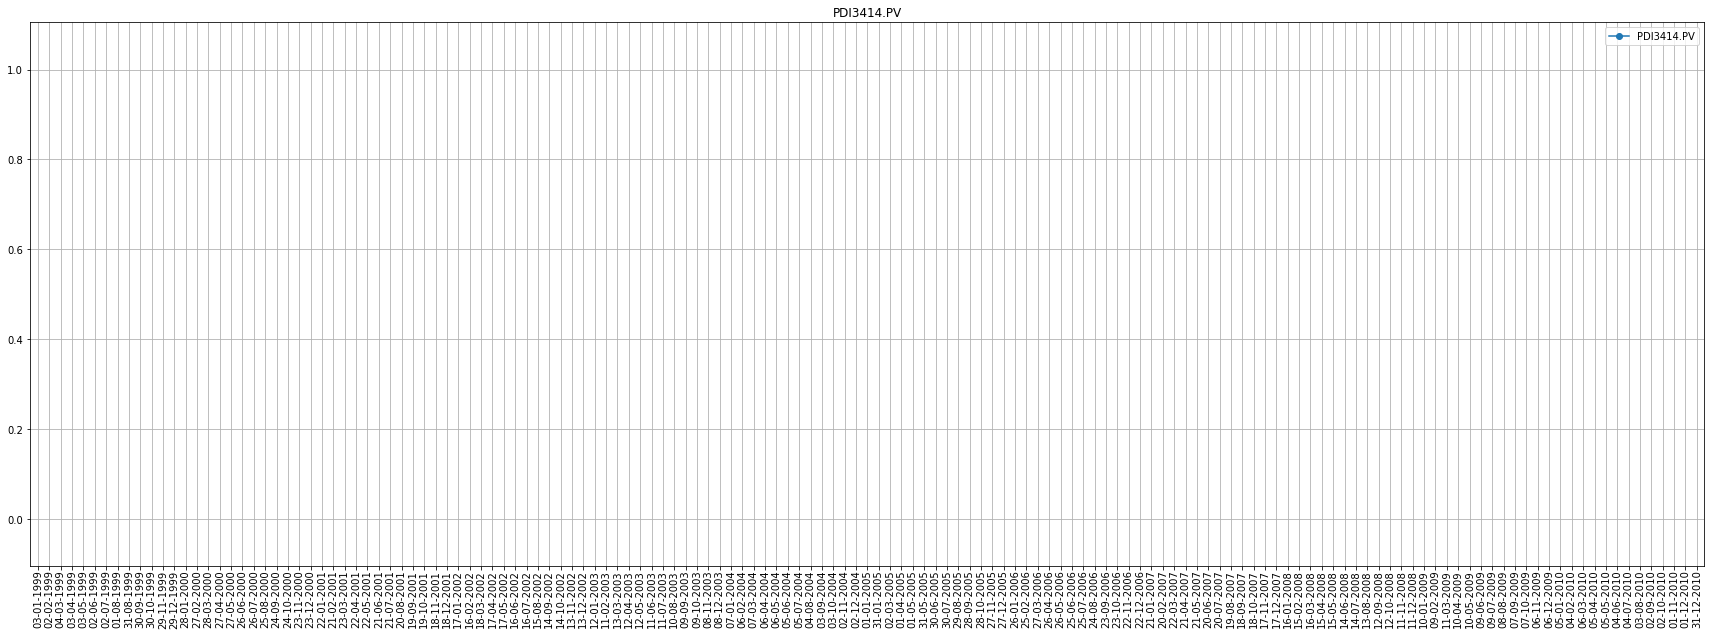

(2371445, 1)


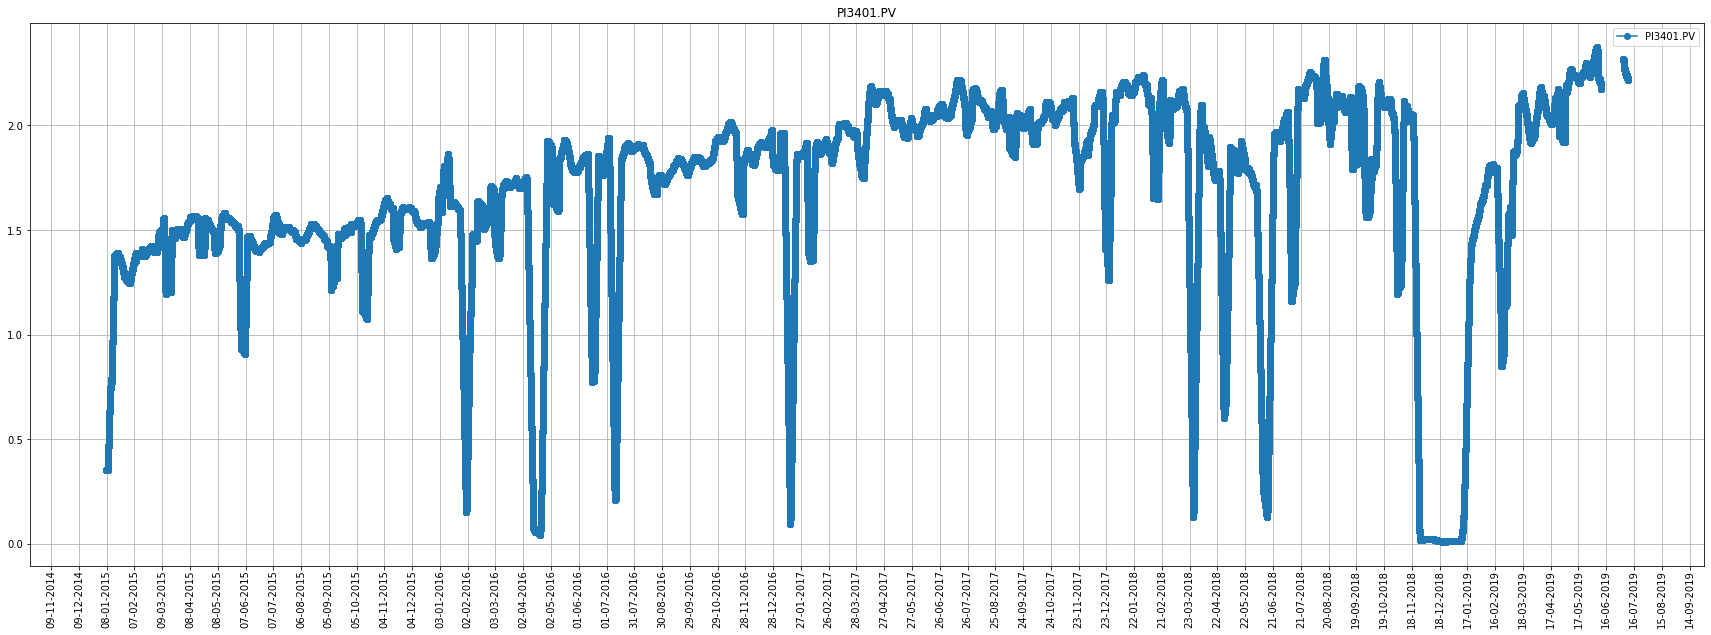

(2371445, 1)


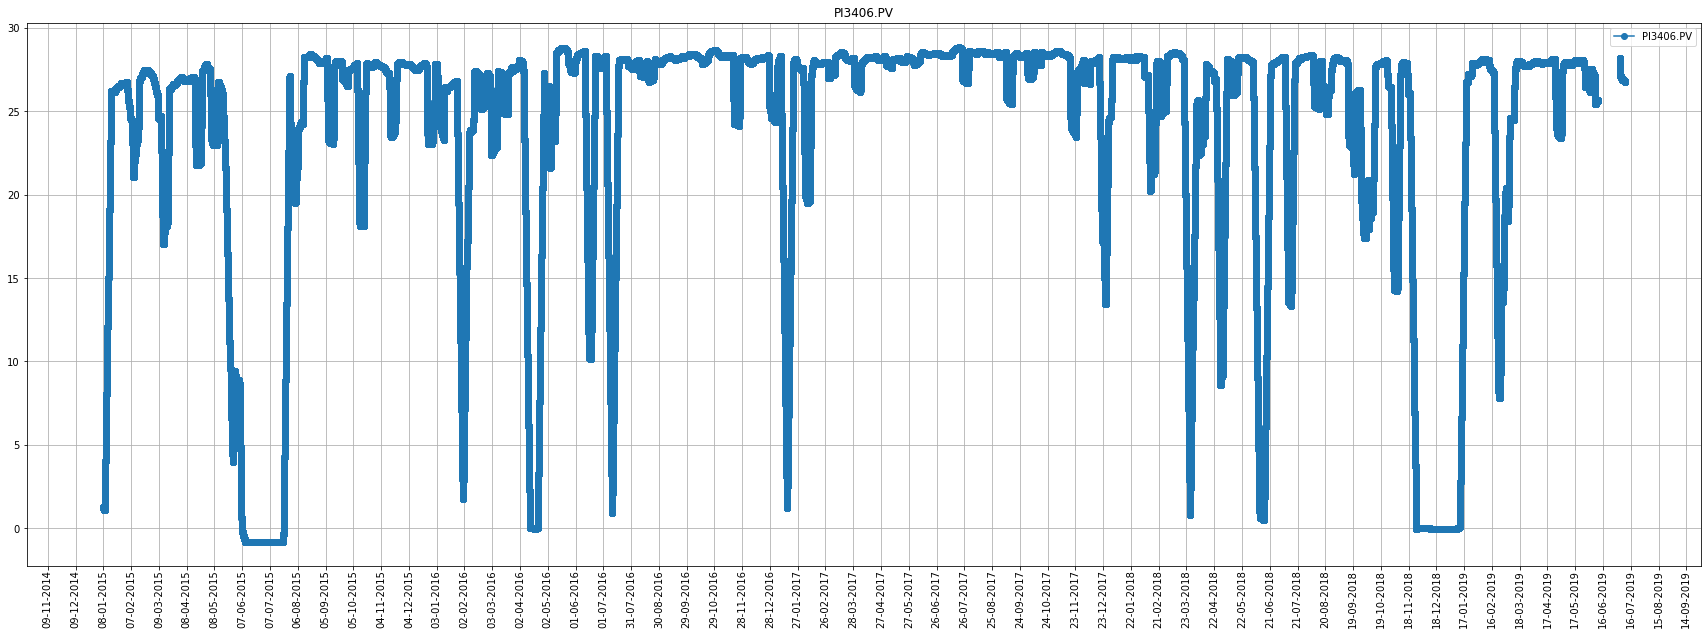

(2371445, 1)


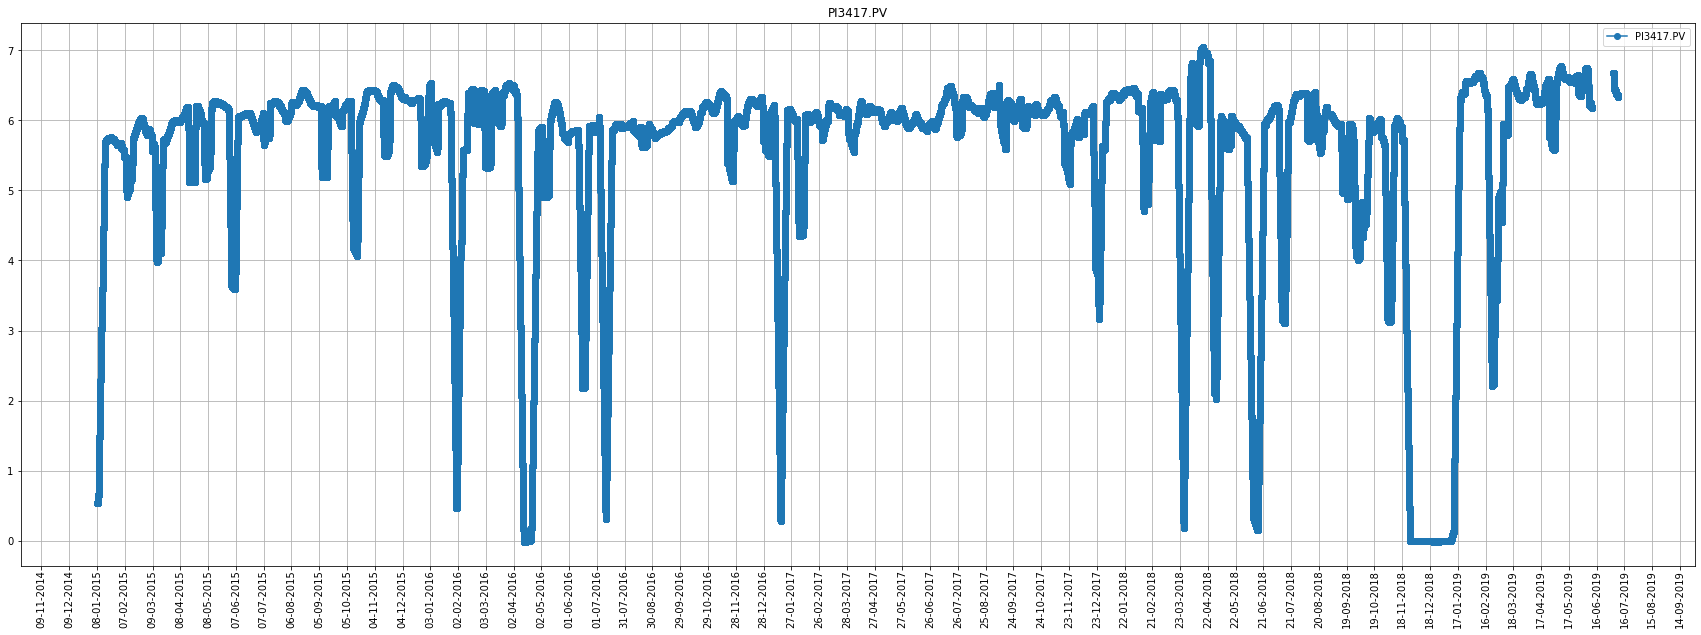

(2371445, 1)


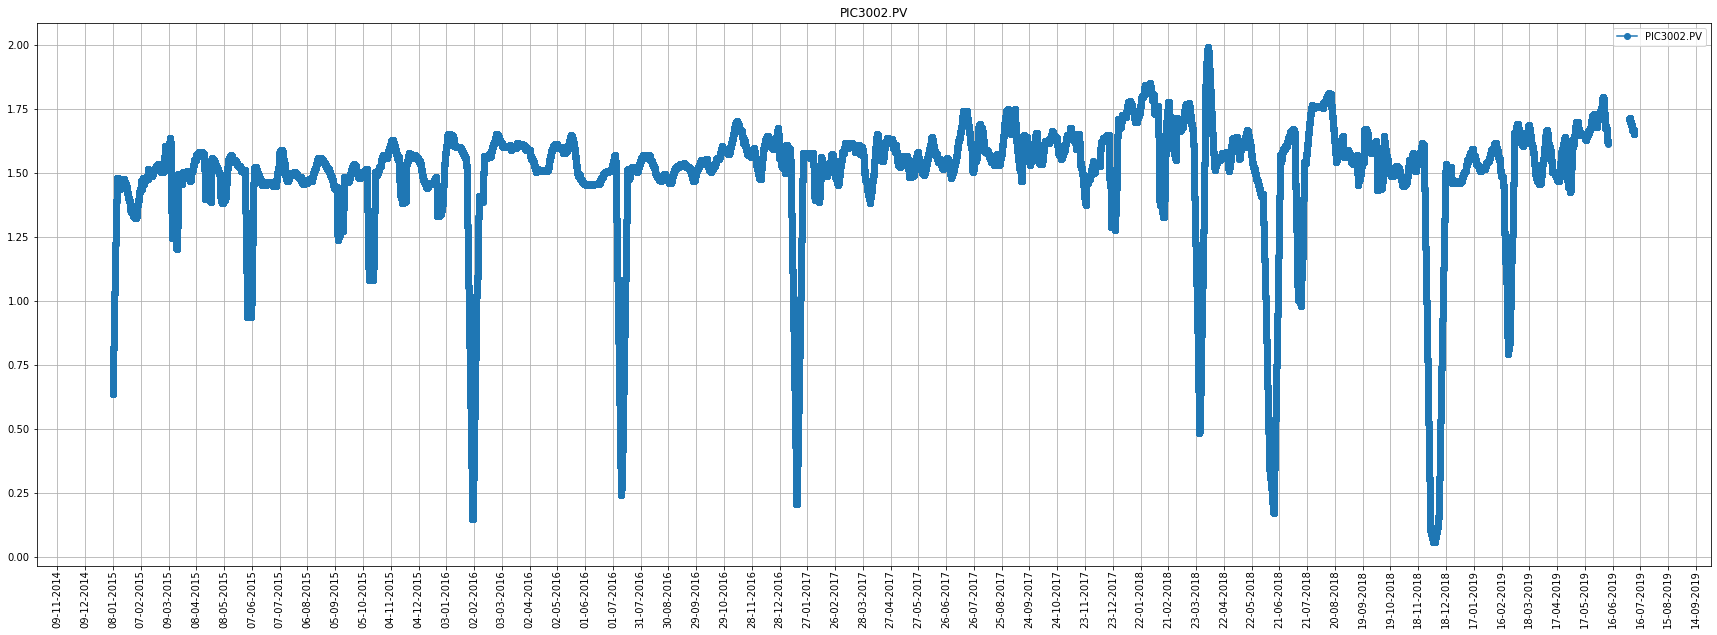

In [9]:
start_date ='2015-01-01 00:00:00'
end_date = '2019-10-30 23:59:00'
days_interval = 30
minutes_interval = 60*12
roling = [7*60*24]
for tag in colunas:
    plot_variables_rolling_V2(data,[tag],legend=[tag],reference_line=[],
                           rolling_time=roling,
                           minutes_interval=minutes_interval,start_date=start_date,end_date=end_date,days_interval=days_interval);

In [10]:
if 'PDI3414.PV' in data.columns:
    data.drop('PDI3414.PV', axis = 1, inplace = True)
data.sort_index(inplace = True)
data_2015 = data.loc[start_date:]   # pegando os dados a partir de 2015

C:\Users\jessica.assumpcao\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [11]:
descricao_tag = tags_names[comp][tipo]
data_2015.rename(columns = descricao_tag, inplace = True)
data_2015.columns

C:\Users\jessica.assumpcao\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


Index(['PRESSAO OLEO', 'PRESSAO FLUSH', 'PRESSAO DESCARGA 2o ESTAGIO',
       'PRESSÃO SUCCAO 2o ESTAGIO', 'PRESSÃO SUCCAO 1o ESTAGIO'],
      dtype='object')

In [12]:
data_2015.describe()

,PRESSAO OLEO,PRESSAO FLUSH,PRESSAO DESCARGA 2o ESTAGIO,PRESSÃO SUCCAO 2o ESTAGIO,PRESSÃO SUCCAO 1o ESTAGIO
count,2.348043e+06,2.348043e+06,2.348043e+06,2.348044e+06,2.348043e+06
mean,2.985330e+00,1.677176e+00,2.361634e+01,5.492398e+00,1.499434e+00
std,1.229032e+00,6.093550e-01,1.001147e+01,1.939117e+00,3.541999e-01
min,-0.000000e+00,-3.600000e-02,-8.000000e-01,-4.900000e-02,-2.000000e+00
25%,2.699000e+00,1.527000e+00,2.699400e+01,5.829000e+00,1.440000e+00
50%,3.049000e+00,1.849000e+00,2.791400e+01,6.109000e+00,1.548000e+00
75%,3.325000e+00,2.059000e+00,2.833800e+01,6.365000e+00,1.661000e+00
max,4.999000e+00,6.180000e+00,3.193500e+01,8.413000e+00,3.319000e+00


Considerações finais:
* Somente a pressão no óleo não apresenta valor mínimo negativo
* O desvio padrão da pressão de descarga do 2º estágio está girando em torno de 10 (estranho? std alto?)